<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>WiDS 2023</b> Bayesian Optimization for CatBoost Hyperparameter Tuning and ...</h2>

<div style="text-align: justify;">In this Kaggle notebook, we have employed a variety of advanced machine learning techniques to improve our model's performance. Firstly, we have used <b>Bayesian optimization</b> to tune the hyperparameters of our <b>CatBoost model</b>, which is a powerful gradient boosting algorithm. This approach enables us to automatically search the hyperparameter space, saving us significant amounts of time and manual effort. 
Furthermore, we have utilized <b>Adversarial Validation</b>, a technique that involves training a model to differentiate between training and test data. This approach allows us to identify whether our model is overfitting or underfitting the training data, thus improving its overall robustness.
Additionally, we have implemented <b>Explainable Machine Learning using SHAP</b>, a method that provides insights into how different features affect our model's predictions. This enables us to understand and interpret our model's behavior more effectively, improving our ability to make informed decisions based on its outputs.
We have also employed <b>Pseudo Labeling</b>, a technique that involves using a model's predictions on unlabeled data to generate new labeled data. This approach can significantly increase the amount of training data available to us, improving our model's performance on the test data.
Lastly, we have used <b>Ensemble Learning</b>, which involves combining the outputs of multiple models to create a final prediction. This approach can improve the overall accuracy and robustness of our model, particularly in cases where individual models may struggle to capture the full complexity of the data.</div>

<a id="lib"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Importing Required Libraries</b></div> 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor

<a id="read_data"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Reading Dataset</b></div> 

In [2]:
train_raw = pd.read_csv('train_data.csv', parse_dates=["startdate"])
test_raw = pd.read_csv('test_data.csv', parse_dates=["startdate"])
submit = pd.read_csv('sample_solution.csv')
target = 'contest-tmp2m-14d__tmp2m'

train_raw.head()

index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333 2014-09-01                              237.00   
1      1  0.0  0.833333 2014-09-02                              228.90   
2      2  0.0  0.833333 2014-09-03                              220.69   
3      3  0.0  0.833333 2014-09-04                              225.28   
4      4  0.0  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2                    29.57                    30.73                    29.71   
3                    29.57                    30.73                    29.71   
4                    29.57                    30.73                    29.71   

   nmme0-tmp2m-34w__gfdlflora0  nmme0-tmp2m-34w__gfdlflorb0  \
0                        31.52                        31.68   
1                        31.52                        31.68   
2                        31.52                        31.68   
3                        31.52                        31.68   
4                        31.52                        31.68   

   nmme0-tmp2m-34w__gfdl0  nmme0-tmp2m-34w__nasa0  nmme0-tmp2m-34w__nmme0mean  \
0                   30.56                   29.66                       30.46   
1                   30.56                   29.66                       30.46   
2                   30.56                   29.66                       30.46   
3                   30.56                   29.66                       30.46   
4                   30.56                   29.66                       30.46   

   contest-wind-h10-14d__wind-hgt-10  nmme-tmp2m-56w__cancm3  \
0                           31246.63                    28.3   
1                           31244.78                    28.3   
2                           31239.27                    28.3   
3                           31232.86                    28.3   
4                           31226.16                    28.3   

   nmme-tmp2m-56w__cancm4  nmme-tmp2m-56w__ccsm3  nmme-tmp2m-56w__ccsm4  \
0                   29.47                  27.13                  27.36   
1                   29.47                  27.13                  27.36   
2                   29.47                  27.13                  27.36   
3                   29.47                  27.13                  27.36   
4                   29.47                  27.13                  27.36   

   nmme-tmp2m-56w__cfsv2  nmme-tmp2m-56w__gfdl  nmme-tmp2m-56w__gfdlflora  \
0                  27.71                 28.25                       27.7   
1                  27.71                 28.25                       27.7   
2                  27.71                 28.25                       27.7   
3                  27.71                 28.25                       27.7   
4                  27.71                 28.25                       27.7   

   nmme-tmp2m-56w__gfdlflorb  nmme-tmp2m-56w__nasa  nmme-tmp2m-56w__nmmemean  \
0                      28.72                 28.38                     28.11   
1                      28.72                 28.38                     28.11   
2                      28.72                 28.38                     28.11   
3                      28.72                 28.38                     28.11   
4                      28.72                 28.38                     28.11   

   contest-rhum-sig995-14d__rhum  nmme-prate-34w__cancm3  \
0                          8

<a id = "process"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Preprocessing Dataset</b></div> 

In [3]:
def rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

def location_nom(train, test):
    # Ref: https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved
    scale = 14

    train.loc[:,'lat']=round(train.lat,scale)
    train.loc[:,'lon']=round(train.lon,scale)
    test.loc[:,'lat']=round(test.lat,scale)
    test.loc[:,'lon']=round(test.lon,scale)

    all_df = pd.concat([train, test], axis=0)
    all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
    train = all_df.iloc[:len(train)]
    test = all_df.iloc[len(train):].drop(target, axis=1)
    
    return train, test

def categorical_encode(train, test):
    le = LabelEncoder()
    train['climateregions__climateregion'] = le.fit_transform(train['climateregions__climateregion'])
    test['climateregions__climateregion'] = le.transform(test['climateregions__climateregion'])
    return train, test
    
def fill_na(df):
    df = df.sort_values(by=['loc_group', 'startdate']).ffill()
    return df

def creat_new_featute(df):
    df['year'] = df['startdate'].dt.year
    df['month'] = df['startdate'].dt.month
    df['day_of_year'] = df['startdate'].dt.dayofyear
    # df['day_of_week'] = df['startdate'].dt.dayofweek
    # df['week_of_year'] = df['startdate'].dt.isocalendar().week
    return df

def feature_engineering(train_raw, test_raw):
    train, test = location_nom(train_raw, test_raw)
    train = fill_na(train)
    train = creat_new_featute(train)
    test = creat_new_featute(test)
    train, test = categorical_encode(train, test)

    drop_cols = ['index', 'startdate', 'lat', 'lon', target]
    features = [col for col in train.columns if col not in drop_cols]
    X = train[features]
    X_test = test[features]
    y = train[target]

    return X, y, X_test

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Train and Validation</b></div> 

In [4]:
X, y, X_test = feature_engineering(train_raw.copy(), test_raw.copy())
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
print(f'Train_shape: {X_train.shape}    |   Val_shape: {X_val.shape}    |   Test_shape: {X_test.shape}')

Train_shape: (251741, 245)    |   Val_shape: (123993, 245)    |   Test_shape: (31354, 245)


<a id = "adv"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Adversarial Validation</b></div>

Adversarial Validation is a technique used to ensure that the distribution of data in the training set is similar to that of the test set. This is important because if the data in the training set is not representative of the test set, the model's predictions may not be accurate.

To perform Adversarial Validation, the following steps are taken:

1. Combine the train and test features into a single set
1. Create a target label to indicate whether a sample is from the train or test set
1. Build a model to classify samples as belonging to the train or test set

If the model is able to accurately distinguish between train and test samples, this indicates that there are features in the data that are different between the two sets. Adversarial Validation can be used to identify these features by using the feature importance generated by the model and evaluating the separation between the train and test datasets using the AUC metric.

Reference: Pan, J., Pham, V., Dorairaj, M., Chen, H., & Lee, J. Y. (2020). Adversarial validation approach to concept drift problem in user targeting automation systems at uber. [arXiv preprint arXiv:2004.03045](https://arxiv.org/abs/2004.03045).

In [5]:
import lightgbm as lgb

def run_adversial_validation(train_X_ml, test_X_ml):
    
    lgb_params = {'n_estimators':100,
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'verbose': 0
                    }
    # combine train & test features, create label to identify test vs train
    ad_y = np.array([1]*train_X_ml.shape[0] + [0]*test_X_ml.shape[0])
    ad_X = pd.concat([train_X_ml, test_X_ml])

    # evaluate model performance using cross-validation
    lgb_data = lgb.Dataset(ad_X, ad_y)
    cv_lgb = lgb.cv(lgb_params, lgb_data)

    print("Adversarial Validation AUC Score: {}".format(cv_lgb['auc-mean'][-1]))
    
    # train model & get feature importance
    ad_val_mod = lgb.train(lgb_params, lgb_data)
    
    print(pd.DataFrame(
        {'feat':ad_X.columns, 
         'imp':ad_val_mod.feature_importance()}).sort_values('imp', ascending = False))
    
    return ad_val_mod

In [6]:
ad_val_mod = run_adversial_validation(X_train, X_test)

C:\Users\LAPTOP\anaconda3\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.249061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.282416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.266939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.259255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\LAPTOP\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.373457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

It seems that there is a concept drift between train and test dataset and removing features like "contest-pevpr-sfc-gauss-14d__pevpr" and "nmme0-tmp2m-34w__cancm30" might help to increase the performance. 

In [7]:
# X.drop(['contest-pevpr-sfc-gauss-14d__pevpr','nmme0-tmp2m-34w__cancm30'], inplace = True)
# X_test.drop(['contest-pevpr-sfc-gauss-14d__pevpr','nmme0-tmp2m-34w__cancm30'], inplace = True)

<a id="bocat"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Bayesian Optimization for CatBoost</b></div> 

[Here's](https://en.wikipedia.org/wiki/Bayesian_optimization) a wikipedia article about Bayesian Optimization, it's essentially a way to find good parameters by searching for these parameters sequentially. So the next parameter search values depend on the performance of the previous parameter values. This is a popular technique for finding optimal parameters. This may take some time to run. Also, you can tune many parameters, below are just some of the parameters that I choose to tune. For this notebook, I'm going to fix the number of estimators to be 100 to save time when running this notebook, but you can increase it to your liking or tune that parameter too if you'd like. You can change the number of iterations and initial points.

In [8]:
# source: https://medium.com/ai-in-plain-english/catboost-cross-validated-bayesian-hyperparameter-tuning-91f1804b71dd

X1, Y1 = X.copy(), y.copy()

from catboost import Pool, cv, CatBoostRegressor
from bayes_opt import BayesianOptimization
from bayes_opt import BayesianOptimization as BO
import warnings
from sklearn.model_selection import * 
from sklearn.metrics import *

Use_BO = False

if Use_BO:
    #n_estimators,
    # num_leaves
    def CB_opt(depth, learning_rate, subsample, l2_leaf_reg, model_size_reg): 

        scores = []
    #     skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1944)
        trainx, valx, trainy, valy = train_test_split(X1, Y1, test_size=0.33, random_state=42)

        reg = CatBoostRegressor(   
                                        verbose = 0,
                                        #iterations=10,
                                        #n_estimators = 10,
                                        learning_rate = learning_rate,
                                        subsample = subsample, 
                                        l2_leaf_reg = l2_leaf_reg,
                                        max_depth = int(depth),
                                        #num_leaves = int(num_leaves),
                                        random_state = 1212,
                                        #grow_policy = "Lossguide",
    #                                     max_bin = int(max_bin),  
                                        use_best_model = True, 
                                        # bootstrap_type='Bayesian',
                                        loss_function='RMSE',
                                        model_size_reg = model_size_reg
                                    )

        reg.fit(trainx, trainy, eval_set = (valx, valy))
        y_pred = reg.predict(valx)
        scores.append(rmse(valy, y_pred))

        return 1/np.mean(scores)

    #"n_estimators": (150,1200),
    # "num_leaves": (100,150),
    # "max_bin":(150,300),
    pbounds = {
               "depth": (6, 7),
               "learning_rate": (0.09, 0.0980689972639084),
               "subsample":(0.7, 0.800000011920929),
               "l2_leaf_reg":(2,4),
               "model_size_reg": (0.48, 0.5)
    }

    optimizer = BayesianOptimization(f = CB_opt, pbounds = pbounds,  verbose = 2, random_state = 1212)

    optimizer.maximize(init_points = 7, n_iter = 30, acq = 'ucb', alpha = 1e-6)

    print(optimizer.max)

    max_bo_params = optimizer.max['params']

    max_bo_params

In [9]:
Use_BO_result = False

if Use_BO_result:
    opt_params = {
              'iterations':2000,
              'verbose':0,
              'learning_rate' : max_bo_params['learning_rate'],
              'subsample' : max_bo_params['subsample'], 
              'l2_leaf_reg' : max_bo_params['l2_leaf_reg'],
              'max_depth' : int(max_bo_params['depth']), 
              'use_best_model' : True, 
              'loss_function' : 'RMSE',
              'model_size_reg' : max_bo_params['model_size_reg']
             }
else:
    opt_params = {
          'iterations':25000,
          'verbose':0,
          'learning_rate' : 0.0980689972639084,
          'subsample' : 0.7443133148363695, 
          'l2_leaf_reg' : 2.3722386345448316,
          'max_depth' : int(6.599144674342465),
          'use_best_model' : True, 
          'loss_function' : 'RMSE',
          'model_size_reg' : 0.4833187897595954
         }

In [10]:
## catBoost Pool object
train_pool = Pool(data=X1,label = Y1)

X_train, X_test2, y_train, y_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)

bst = CatBoostRegressor(**opt_params)
bst.fit(train_pool, eval_set=(X_test2, y_test), plot=False,silent=True)
print(bst.get_best_score())

{'learn': {'RMSE': 0.10243391693615775}, 'validation': {'RMSE': 0.10210959826204279}}


<a id="fi"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Feature Importance</b></div>

Text(0.5, 1.0, 'Feature Importance')

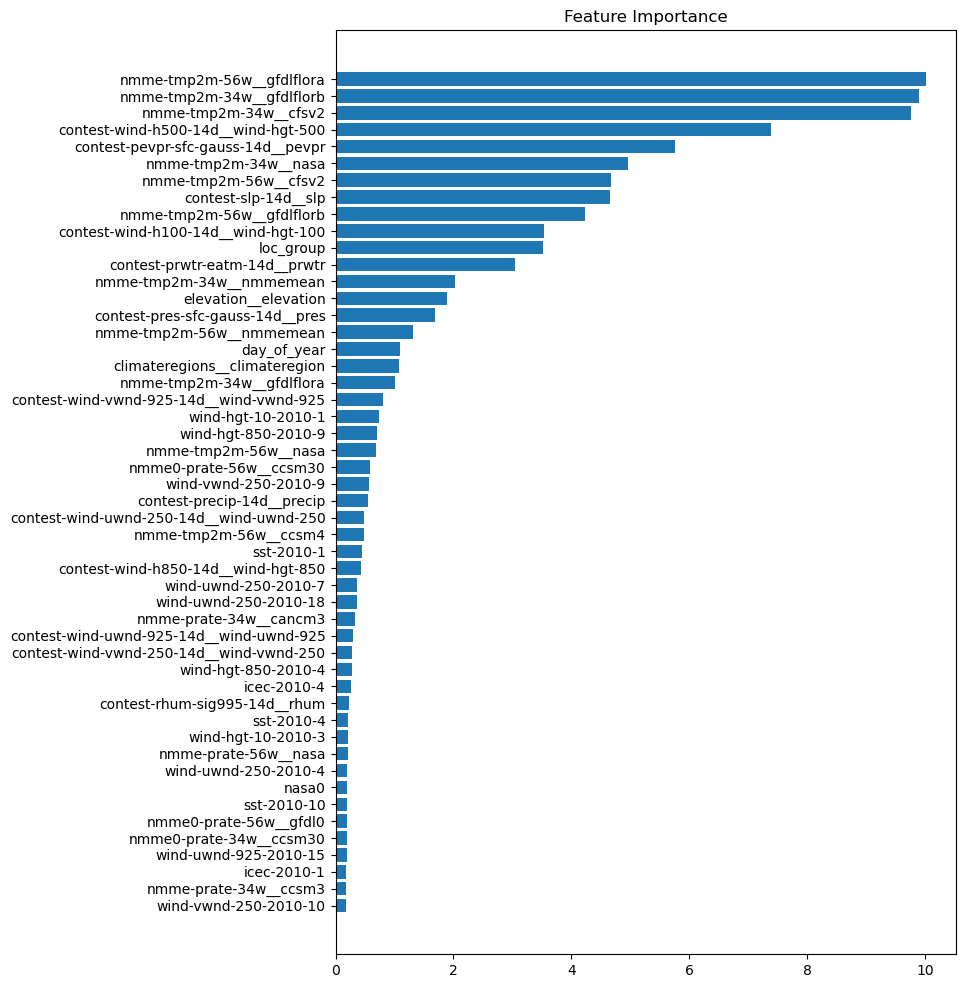

In [11]:
import matplotlib.pyplot as plt
feature_importance = bst.feature_importances_
max_features = 50
sorted_idx = np.argsort(feature_importance)[-max_features:]
fig = plt.figure(figsize=(8, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

<a id = "xml"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Machine Learning Explainability</b></div>

<div style="text-align: justify;">In this section, we showcase a sample of SHAP explainability evaluation for our model. SHAP (SHapley Additive exPlanations) is a popular approach for providing model interpretability by measuring the contribution of each feature to a prediction. This enables us to identify which features have the greatest impact on our model's outputs, and how they are related to the predicted values. 
To perform the SHAP evaluation, we first generate a set of test data and extract the features we want to evaluate. We then use the SHAP library to compute the SHAP values for each feature, which represent the change in the predicted value as a result of changing the feature value while holding all other features constant. These values are visualized using a SHAP summary plot, which shows the features ranked by their importance and the direction of their impact on the predicted value. Through the SHAP summary plot, we can observe the top contributing features to our model's predictions, and how they are positively or negatively correlated with the output. This enables us to gain insights into the underlying relationships between the features and the target variable, improving our understanding of how our model makes its predictions. Overall, the SHAP explainability evaluation provides a valuable tool for gaining insights into the inner workings of our model and making informed decisions based on its outputs.</div>

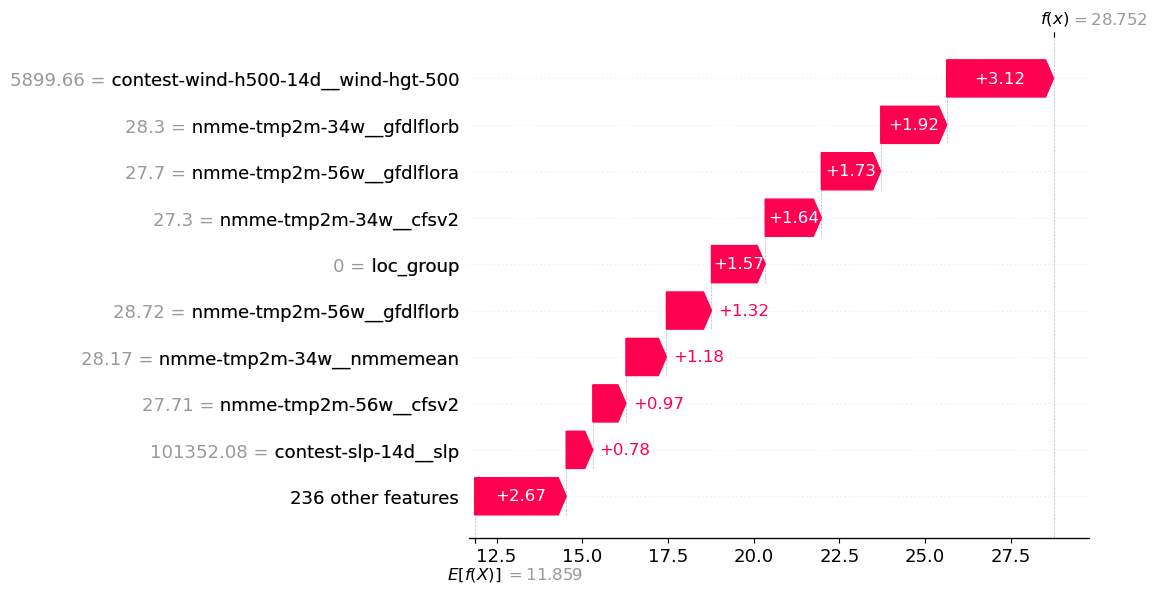

In [12]:
import shap

explainer = shap.Explainer(bst)
shap_values = explainer(X1)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

<a id = "PL"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Pseudo Labeling and Postprocessing</b></div>

In [14]:
# Pseudo Labelling
train_pseudo = X_test.copy()
ddf = pd.read_csv('submission (17).csv')
y_test_pred  = ddf[target].values.flatten() #ddf[target] #bst.predict(X_test)
train_pseudo[target] = y_test_pred

X_train_pseudo = X_train.copy() 
X_train_pseudo[target] = y_train

train_mod = pd.concat([X_train_pseudo.copy(), train_pseudo], axis=0).reset_index(drop=True)
features = [c for c in X_test.columns if (c != 'id')]
display(train_mod)

XX = train_mod[features]
yy = train_mod[target]
y_oof_pred = np.zeros(len(yy))

X_testt = X_test[features].values
y_test_pred2 = np.zeros(len(X_testt))

contest-pevpr-sfc-gauss-14d__pevpr  nmme0-tmp2m-34w__cancm30  \
0                                   158.93                     18.39   
1                                    17.68                     -2.01   
2                                    15.29                      5.69   
3                                    39.74                     -6.40   
4                                   176.57                      9.80   
...                                    ...                       ...   
283090                               62.72                      4.60   
283091                               73.41                      4.60   
283092                               70.00                      4.60   
283093                               79.81                      4.60   
283094                               86.17                      4.60   

        nmme0-tmp2m-34w__cancm40  nmme0-tmp2m-34w__ccsm30  \
0                          21.47                    17.64   
1                          -1.47                    -1.93   
2                           6.56                     6.70   
3                          -4.13                    -5.81   
4                          11.86                    11.74   
...                          ...                      ...   
283090                      8.71                     6.05   
283091                      8.71                     6.05   
283092                      8.71                     6.05   
283093                      8.71                     6.05   
283094                      8.71                     6.05   

        nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                         19.88                    16.98   
1                          0.01                    -1.26   
2                          7.49                     6.76   
3                         -8.79                    -6.02   
4                         13.53                    11.94   
...                         ...                      ...   
283090                    10.08                     6.39   
283091                    10.08                     6.39   
283092                    10.08                     6.39   
283093                    10.08                     6.39   
283094                    10.08                     6.39   

        nmme0-tmp2m-34w__gfdlflora0  nmme0-tmp2m-34w__gfdlflorb0  \
0                             16.02                        16.34   
1                             -3.83                        -3.46   
2                              9.54                        10.16   
3                             -3.84                        -3.43   
4                             12.30                        12.23   
...                             ...                          ...   
283090                         8.42                         9.08   
283091                         8.42                         9.08   
283092                         8.42                         9.08   
283093                         8.42                         9.08   
283094                         8.42                         9.08   

        nmme0-tmp2m-34w__gfdl0  nmme0-tmp2m-34w__nasa0  \
0                        18.78                   19.43   
1                        -0.44                   -1.53   
2                         6.81                    6.14   
3                        -5.28                   -9.13   
4                        13.11                   14.51   
...                        ...                     ...   
283090                    5.53                    6.97   
283091                    5.53                    6.97   
283092                    5.53                    6.97   
283093                    5.53                    6.97   
283094                    5.53                    6.97   

        nmme0-tmp2m-34w__nmme0mean  contest-wind-h10-14d__wind-hgt-10  \
0                            18.33                           30890.89   
1                            

In [16]:
yy[np.isnan(yy)] = 0
train_pool = Pool(data=XX,label = yy)

X_train3, X_test3, y_trai3, y_test3 = train_test_split(XX, yy, test_size=0.33, random_state=42)

bst2 = CatBoostRegressor(**opt_params)
bst2.fit(train_pool, eval_set=(X_test3, y_test3), plot=True,silent=True)
print(bst2.get_best_score())


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'RMSE': 0.10192210766896981}, 'validation': {'RMSE': 0.10187230982530884}}


<a id = "EL"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Ensemble Learning</b></div>

In [17]:
import lightgbm as lgb

# set up parameters for LightGBM
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 4,
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'early_stopping_round': 50,
          'n_estimators': 15000}

reg_lgb = lgb.LGBMRegressor(**params)

reg_lgb.fit(X_train3, y_trai3, eval_set=(X_test3, y_test3),verbose=100)

y_pred_cat = bst2.predict(X_test)

y_pred_lgb = reg_lgb.predict(X_test)



'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[100]	valid_0's rmse: 1.4147
[200]	valid_0's rmse: 1.1543
[300]	valid_0's rmse: 1.03981
[400]	valid_0's rmse: 0.95773
[500]	valid_0's rmse: 0.898038
[600]	valid_0's rmse: 0.849873
[700]	valid_0's rmse: 0.811271
[800]	valid_0's rmse: 0.778308
[900]	valid_0's rmse: 0.754021
[1000]	valid_0's rmse: 0.733909
[1100]	valid_0's rmse: 0.710613
[1200]	valid_0's rmse: 0.688852
[1300]	valid_0's rmse: 0.671325
[1400]	valid_0's rmse: 0.653565
[1500]	valid_0's rmse: 0.637441
[1600]	valid_0's rmse: 0.623765
[1700]	valid_0's rmse: 0.610064
[1800]	valid_0's rmse: 0.597197
[1900]	valid_0's rmse: 0.587298
[2000]	valid_0's rmse: 0.577173
[2100]	valid_0's rmse: 0.5

In [18]:
import xgboost as xgb
reg_xgb = xgb.XGBRegressor(base_score=0.5, 
                           n_estimators=15000,
                           objective='reg:linear',
                           max_depth=4,
                           early_stopping_rounds=100,
                           learning_rate=0.01)

reg_xgb.fit(X_train3, y_trai3, eval_set=((X_test3, y_test3),), verbose=100)

y_pred_xgb = reg_xgb.predict(X_test)

[18:58:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14.94959
[100]	validation_0-rmse:5.90242
[200]	validation_0-rmse:2.79630
[300]	validation_0-rmse:1.83707
[400]	validation_0-rmse:1.53217
[500]	validation_0-rmse:1.40009
[600]	validation_0-rmse:1.31403
[700]	validation_0-rmse:1.25480
[800]	validation_0-rmse:1.21138
[900]	validation_0-rmse:1.17562
[1000]	validation_0-rmse:1.14185
[1100]	validation_0-rmse:1.11316
[1200]	validation_0-rmse:1.08534
[1300]	validation_0-rmse:1.06114
[1400]	validation_0-rmse:1.04095
[1500]	validation_0-rmse:1.02180
[1600]	validation_0-rmse:1.00410
[1700]	validation_0-rmse:0.98595
[1800]	validation_0-rmse:0.97012
[1900]	validation_0-rmse:0.95513
[2000]	validation_0-rmse:0.94173
[2100]	validation_0-rmse:0.92837
[2200]	validation_0-rmse:0.91586
[2300]	validation_0-r

In [19]:
from tensorflow import keras
from keras import backend as K
import tensorflow as tf

from tensorflow import keras
from keras import backend as K
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
from keras.backend import sigmoid
from keras import backend as K

tf.random.set_seed(42)

In [20]:
def root_mean_squared_error(y_true, y_pred):
         return K.sqrt(K.mean(K.square( (y_true - y_pred) )))
    
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=50, verbose=0,
    mode='min',restore_best_weights=True)

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.25, patience=8, verbose=0,
    mode='min')

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

def mish(x, beta = 1):
    return (x * K.tanh(K.softplus(x)))


get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'mish': Activation(mish)})

In [21]:
def base_model(hidden_units, embedding_size, train_cols, 
               categorical_cols, uniques):
    
    n_cont=0
    initial_inputs=[]
    for col in categorical_cols:
        temp_input = keras.Input(shape=(1,), name=col)
        n_cont+=1
        initial_inputs.append(temp_input)
        
    num_input = keras.Input(shape=(len(train_cols)-n_cont,), name='num_data')
    initial_inputs.append(num_input)

    #embedding, flatenning and concatenating
    all_inputs=[]
    for i, col in enumerate(categorical_cols):
        temp_embedded = keras.layers.Embedding(int(uniques[col]), embedding_size, 
                                               input_length=1, name=f'{col}_embedding')(initial_inputs[i])
        temp_flattened = keras.layers.Flatten()(temp_embedded)
        all_inputs.append(temp_flattened)
    
    all_inputs.append(num_input)
    out = keras.layers.Concatenate()(all_inputs)
    
    # Add one or more hidden layers
    for n_hidden in hidden_units:
        out = keras.layers.Dense(n_hidden, activation='swish')(out)

    # A single output: our predicted rating
    out = keras.layers.Dense(1, activation='linear', name='prediction')(out)

    model = keras.Model(inputs = initial_inputs, outputs = out)
    
    return model

In [22]:
def fit_keras_nn(Nfolds, train_df, test_df, train_cols, cat_cols, TARGET, 
                   model_path):
    
    model_name = 'Keras_NN'
    oof_keras = np.zeros(train_df.shape[0])
    pred_keras = np.zeros(test_df.shape[0])
    scores=[]
    
    train_df = train_df.copy()
    test_df = test_df.copy()
    train_df = train_df.fillna(0)
    test_df = test_df.fillna(0)
    
    cont_cols = train_cols.copy()
    uniques={}
    for col in cat_cols:
        cont_cols.remove(col)
        le = LabelEncoder()
        le.fit(pd.concat([train_df[col], test_df[col]]))
        train_df[col] = le.transform(train_df[col].values)
        test_df[col] = le.transform(test_df[col].values)
        uniques[col] = len(pd.concat([train_df[col], test_df[col]], axis=0).unique())
        
    scaler = RobustScaler(quantile_range=(10.0, 90.0)).fit(pd.concat([train_df[cont_cols], test_df[cont_cols]], axis=0))       
    train_df[cont_cols] = scaler.transform(train_df[cont_cols].values)
    test_df[cont_cols] = scaler.transform(test_df[cont_cols].values)
    
    test_inputs=[]
    for col in cat_cols:
        test_inputs.append(test_df[col].values)
        
    test_inputs.append(test_df[cont_cols].values)
    
    for fold in range(Nfolds):
        
        print("*"*10, f'Fold-{fold+1}', "*"*10,)
      
        X_train = train_df.loc[train_df.fold!=fold, train_cols]
        y_train = train_df.loc[train_df.fold!=fold, TARGET]
        X_val = train_df.loc[train_df.fold==fold, train_cols]
        y_val = train_df.loc[train_df.fold==fold, TARGET]
        
        model = base_model(hidden_units=(512, 512, 256), embedding_size=16, 
                           train_cols=train_cols, categorical_cols=cat_cols, 
                          uniques=uniques)
    
        model.compile(
            keras.optimizers.Adam(learning_rate=0.002),
            loss=root_mean_squared_error
        )
        
        
        train_inputs=[]
        for col in cat_cols:
            train_inputs.append(X_train[col].values)
    
        train_inputs.append(X_train[cont_cols].values)

        val_inputs=[]
        for col in cat_cols:
            val_inputs.append(X_val[col].values)

        val_inputs.append(X_val[cont_cols].values)
        
        if os.path.isfile(model_path + f'{model_name}_{fold}.h5'):
            model =  keras.models.load_model(model_path + f'{model_name}_{fold}.h5', 
                                             custom_objects={'swish': swish, 'Activation': Activation, 
                                                             'root_mean_squared_error':root_mean_squared_error})
        
        else:

            model.fit(train_inputs, 
                      y_train.values,               
                      batch_size=1024,
                      epochs=1000,
                      validation_data=(val_inputs, y_val.values),
                      callbacks=[es, plateau],
                      validation_batch_size=len(y_val),
                      shuffle=True, verbose = 1)

            model.save(f"{model_name}_{fold}.h5")
            
        preds = model.predict(val_inputs).reshape(1,-1)[0]
        
        score = np.sqrt(mean_squared_error(y_val.values, preds))
        scores.append(score)
        oof_keras[X_val.index] = preds
        
        print(f'RMSE for Fold-{fold+1}:', np.round(score, 3))
        
        pred_keras += model.predict(test_inputs).reshape(1,-1)[0]/Nfolds
        
    score = np.sqrt(mean_squared_error(oof_keras, train_df[TARGET]))
    print(f'OOF RMSE:', np.round(score, 3))
    print(f'Average RMSE:', f'{np.round(np.mean(scores), 3)}+/-{np.round(np.std(scores), 3)}')
    
        
    return oof_keras, pred_keras

In [26]:
    
oof_pred_keras, pred_keras = fit_keras_nn(Nfold, X_train3, X_test3, train_cols, categorical_cols, eval_set, model_path)
X_train3 = X_train3.copy()
X_train3['oof_keras'] = oof_pred_keras

NameError: name 'Nfold' is not defined

In [23]:
ensemble_preds = y_pred_lgb*0.51+y_pred_cat*0.42+y_pred_xgb*0.07

In [24]:
ensemble_preds1 = y_pred_lgb*0.35+y_pred_cat*0.6+y_pred_xgb*0.05

In [25]:
submit_cat = submit.copy()
submit_cat[target] = y_pred_cat
submit_cat.to_csv('y_pred_cat.csv', index = False)

submit_lgb = submit.copy()
submit_lgb[target] = y_pred_lgb
submit_lgb.to_csv('y_pred_lgb.csv', index = False)

submit_xgb = submit.copy()
submit_xgb[target] = y_pred_xgb
submit_xgb.to_csv('y_pred_xgb.csv', index = False)

In [2]:
submit_cat = submit.copy()
submit_cat[target] = y_pred_cat
submit_cat.to_csv('y_pred_cat.csv', index = False)

submit_lgb = submit.copy()
submit_lgb[target] = y_pred_lgb
submit_lgb.to_csv('y_pred_lgb.csv', index = False)

submit_xgb = submit.copy()
submit_xgb[target] = y_pred_xgb
submit_xgb.to_csv('y_pred_xgb.csv', index = False)

NameError: name 'submit' is not defined

<a id="submit"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Submission</b></div>

In [ ]:
submit[target] = ensemble_preds
submit.to_csv('submission.csv', index = False)

In [ ]:
submit[target] = ensemble_preds1
submit.to_csv('submission1.csv', index = False)

In [ ]:
import seaborn as sns
def plot_distribution(var):
    plt.subplots(figsize=(14,7))
    sns.distplot(x=X_train3[var], color='blue', kde=True)
    sns.distplot(x=X_test3[var], color='red', kde=True)
    plt.title(var, weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel(var, weight="bold", fontsize=12)
    plt.show()
plot_distribution("contest-rhum-sig995-14d__rhum")



In [ ]:
plot_distribution("wind-vwnd-925-2010-20")

In [ ]:
X_train3.info()

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">

* [[WiDS 2023] Simple basline - RMSE 1.14](https://www.kaggle.com/code/ducanger/wids-2023-simple-basline-rmse-1-14) by [DAT DO](https://www.kaggle.com/ducanger) used as base especially for preprocessing.
* [🔥 EDA & ML on Game Play 🎮 (ongoing)](https://www.kaggle.com/code/nguyenthicamlai/eda-ml-on-game-play-ongoing) by [Nguyen Thi Cam Lai](https://www.kaggle.com/nguyenthicamlai) used for HTML-based headers
* [[WiDS 2021] Tips & Tricks (CatBoost Version)](https://www.kaggle.com/code/kooaslansefat/tips-tricks-catboost-version) used for hyperparameter tunning for CatBoost and adversarial validation
* [WiDS2023_Data_Buddies](https://www.kaggle.com/code/nicholasdominic/wids2023-data-buddies) by [Nicholas Dominic](https://www.kaggle.com/nicholasdominic) for Ensemble Learning